In [28]:
import  matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [29]:
from optionprice import Option
import math

In [54]:
S0 = 100
r = .05 
sigma = .2
T = 3 

In [78]:
def calculate_pay_off(option_type , strike ,  excercise_price,trade_type,option_price):
    if option_type =='c':
        payoff= max(excercise_price-strike-option_price, -option_price)
    if option_type.lower() =='p':
        payoff= max(strike-excercise_price-option_price, -option_price)
    
    if trade_type =='s':
        payoff=-payoff
    return payoff

In [148]:
def calculate_price_bt(option_type, excercise_type, s0, k, r, sigma, dv=0, t=None,  ):
    excercise_type = True if excercise_type == 'EU' else False if excercise_type == 'AM' else None
    kind = 1 if option_type == 'C' else -1
    iteration=400
    delta = t / iteration
    u = np.exp(sigma * np.sqrt(delta))
    d = 1 / u
    p = (np.exp((r -dv) * delta) - d) / (u - d)

    tree = np.arange(0,iteration * 2 + 2,2,dtype=np.float)
    tree[iteration//2 + 1:] = tree[:(iteration+1)//2][::-1]
    np.multiply(tree,-1,out=tree)
    np.add(tree,iteration,out=tree)
    np.power(u,tree[:iteration//2],out=tree[:iteration//2])
    np.power(d,tree[iteration//2:],out=tree[iteration//2:])
    np.maximum((s0 * tree - k) * kind,0,out=tree)

    for j in range(iteration):
        newtree = tree[:-1] * p + tree[1:] * (1 - p)
        newtree = newtree * np.exp(-r * delta)
        if not excercise_type:
            compare = np.abs(iteration - j - 1 - np.arange(tree.size - 1) * 2).astype(np.float)
            np.power(u,compare[:len(compare)//2],out=compare[:len(compare)//2])
            np.power(d,compare[len(compare)//2:],out=compare[len(compare)//2:])
            np.multiply(s0,compare,out=compare)
            np.subtract(compare,k,out=compare)
            np.multiply(compare,kind,out=compare)
            np.maximum(newtree, compare,out=newtree)
        tree = newtree

    return tree[0]
    

In [149]:
calculate_price_bt('C','EU', 100, 120,0, .2, 0 , 90)

62.50514817469003

In [150]:
### Put call parity 


<AxesSubplot:ylabel='Payoff'>

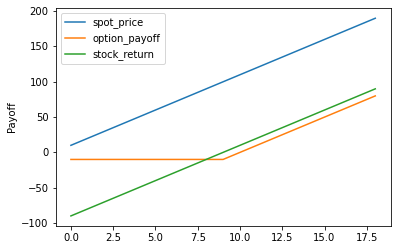

In [151]:
call_excercise_payoff= [{'spot_price': excercise_price, 'option_payoff':calculate_pay_off('c', 100,excercise_price,
                                                                                          'b', 10)} 
 for excercise_price in range (10, 200, 10 )]
df = pd.DataFrame(call_excercise_payoff)
df['stock_return'] = df['spot_price']-S0
df.plot(ylabel = 'Payoff') 

<AxesSubplot:ylabel='Payoff'>

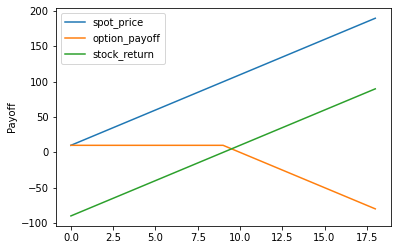

In [152]:
call_excercise_payoff= [{'spot_price': excercise_price, 'option_payoff':calculate_pay_off('c', 100,excercise_price,
                                                                                          's', 10)} 
 for excercise_price in range (10, 200, 10 )]
df = pd.DataFrame(call_excercise_payoff)
df['stock_return'] = df['spot_price']-S0
df.plot(ylabel = 'Payoff') 

<AxesSubplot:title={'center':'Put Buy Payoff'}, ylabel='Payoff'>

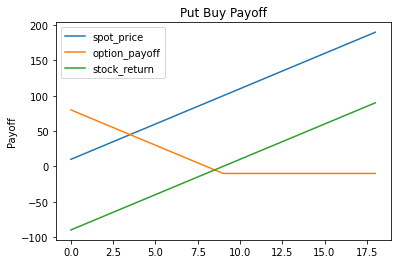

In [153]:
put_excercise_payoff= [{'spot_price': excercise_price, 'option_payoff':calculate_pay_off('p', 100,excercise_price,
                                                                                          'b', 10)} 
 for excercise_price in range (10, 200, 10 )]
df = pd.DataFrame(put_excercise_payoff)
df['stock_return'] = df['spot_price']-S0
df.plot(ylabel = 'Payoff', title = 'Put Buy Payoff') 

<AxesSubplot:title={'center':'Put Buy Payoff'}, xlabel='spot_price', ylabel='Return'>

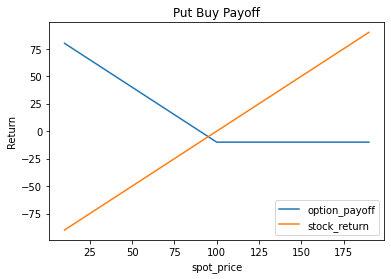

In [154]:
df.set_index('spot_price').plot(ylabel = 'Return', title = 'Put Buy Payoff') 

<AxesSubplot:ylabel='Payoff'>

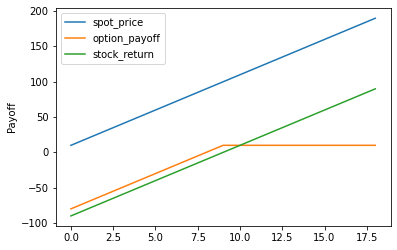

In [155]:
put_excercise_payoff= [{'spot_price': excercise_price, 'option_payoff':calculate_pay_off('p', 100,excercise_price,
                                                                                          's', 10)} 
 for excercise_price in range (10, 200, 10 )]
df = pd.DataFrame(put_excercise_payoff)
df['stock_return'] = df['spot_price']-S0
df.plot(ylabel = 'Payoff')

In [156]:
strike_prices = np.arange(10, 400, 10)

In [157]:
calculate_price_bt('EU','C', 100, 120,0, .2, 0 , 90)

82.50514817469039

<AxesSubplot:>

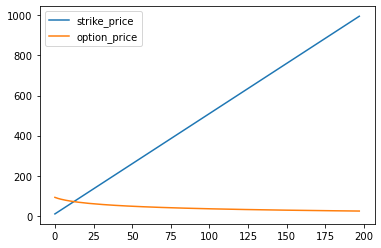

In [159]:
option_prices = [{'strike_price': strike_price, 'option_price':calculate_price_bt('C','EU', 100, strike_price,
                                                                                     0, .2, 0 , 90)} 
                  for strike_price in range (10, 1000, 5 )]
c_option_prices_df = pd.DataFrame(option_prices)
c_option_prices_df.plot()

<AxesSubplot:xlabel='strike_price'>

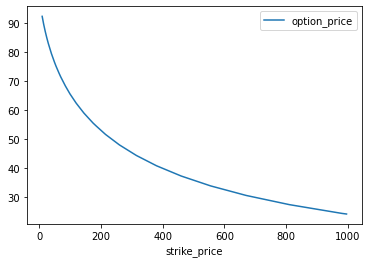

In [165]:
pd.DataFrame(c_option_prices_df).set_index('strike_price').plot()

<AxesSubplot:>

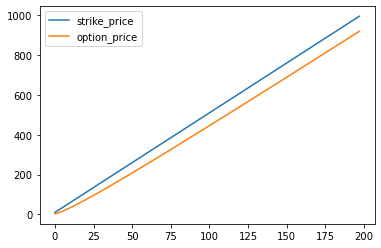

In [161]:
option_prices = [{'strike_price': strike_price, 'option_price':calculate_price_bt('P','EU', 100, strike_price,
                                                                                     0, .2, 0 , 90)} 
                  for strike_price in range (10, 1000, 5 )]
p_option_prices_df = pd.DataFrame(option_prices)
p_option_prices_df.plot()

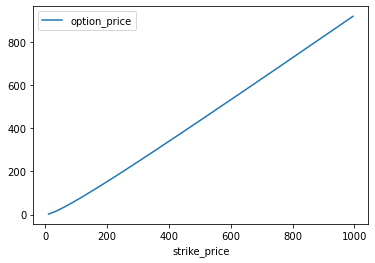

In [166]:
option_prices_df = pd.DataFrame(p_option_prices_df).set_index('strike_price').plot()

In [163]:
p_option_prices_df

,strike_price,option_price
0,10,2.421530
1,15,4.614884
2,20,7.186981
3,25,10.005491
4,30,13.035197
...,...,...
193,975,899.563619
194,980,904.493955
195,985,909.424290
196,990,914.354625


In [164]:
c_option_prices_df

,strike_price,option_price
0,10,92.421530
1,15,89.614884
2,20,87.186981
3,25,85.005491
4,30,83.035197
...,...,...
193,975,24.563619
194,980,24.493955
195,985,24.424290
196,990,24.354625
